

# Project: Investigate Tmdb-movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 



### Question(s) for Analysis


My questions for this dataset are as follows:

1. What are the Net Proft of the movies on the dataset
2. What movie had the highest Net Profit
3. What movie had the highest Revenue 
4. What movie had the highest Net Profit with respect to the 2010 (inflation)
5. What's the correlation between the Net Profit, Revenue, Budget and that of those of 2010 (inflation)

6. Which cast appeared the most in this dataset
7. What movie had the highest runtime
8. What's the most popular movie

Based on Net profit, i'd like to know the following;
**a. the top 5 cast that appeared the most** and,
**b. the top 5 genres to that yielded the most net profit**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# To load the csv file
df_movies = pd.read_csv('tmdb_movies.csv')

df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Using the shape function to get the number of rows and columns of the dataset 

df_movies.shape

(10866, 21)

In [4]:
# To know the datatypes of the dataset

df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Find duplicated rows
df_movies.duplicated().sum()

1

In [6]:
# Find the unique values
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# Find the missing values (by this I can drop some columns if they're above 50%)
df_missing_values = df_movies.isnull().sum()


(df_missing_values/df_movies.shape[0])*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


### Data Cleaning

 

In [8]:
# I'll be dropping 'homepage' cos it has over 50% of it's data missing

df_movies.drop(['homepage'], axis=1, inplace=True)

In [9]:
# Data Cleaning [Converting to proper data types for analysis]
df_movies.id = df_movies.id.astype(str)
df_movies.budget = df_movies.budget.astype(float)
df_movies.revenue = df_movies.revenue.astype(float)
df_movies.release_date = pd.to_datetime(df_movies.release_date)
df_movies.release_year = df_movies.release_year.astype(str)
df_movies['release_month'] = df_movies.release_date.dt.month_name()
df_movies['release_day'] = df_movies.release_date.dt.day_name()

df_movies.rename(columns = {'original_title' : 'movie_title'}, inplace=True)

In [10]:
# To find the net-profit of the dataset

df_movies['net_profit'] = df_movies['revenue'] - df_movies['budget']

In [11]:
# To find the net-profit-adj (inflation) of the dataset

df_movies['net_profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

In [12]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,movie_title,cast,director,tagline,keywords,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,net_profit,net_profit_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday,1.363529e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday,2.284364e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday,1.852382e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday,1.868178e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday,1.316249e+09,1.210949e+09


In [13]:
# To find the most popular movie

popularity = df_movies.popularity.max()
popular_movie_name = df_movies.loc[df_movies['popularity'].idxmax()].movie_title

print(f"{popular_movie_name} was the most popular movie with {popularity} rate.")

Jurassic World was the most popular movie with 32.985763 rate.


In [14]:
# To find the most voted movie

highest_votes = df_movies.vote_count.max()
highest_voted_movie = df_movies.loc[df_movies['vote_count'].idxmax()].movie_title

print(f"{highest_voted_movie} was the most voted movie with {highest_votes} votes.")

Inception was the most voted movie with 9767 votes.


In [15]:
# To find the month that movies were released the most & least

most_released_month = df_movies['release_month'].max()
least_released_month = df_movies['release_month'].min()

print(f"Movies were released on {most_released_month} the most")
print(f"Movies were released on {least_released_month} the least")

Movies were released on September the most
Movies were released on April the least


In [16]:
# Will be using this function to plot my charts in the exploration process

def plotchart(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis








### Research Question 1 (Net Profit of the movies)

In [17]:
# To find the net-profit of the dataset

df_movies['net_profit'] = df_movies['revenue'] - df_movies['budget']

In [18]:
# To find the net-profit-adj (inflation) of the dataset

df_movies['net_profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

In [19]:
# The table shows the Net profit of the movies in the dataset both for the 2010 (inflation) and normal
df_movies.head()

,id,imdb_id,popularity,budget,revenue,movie_title,cast,director,tagline,keywords,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,net_profit,net_profit_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday,1.363529e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday,2.284364e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday,1.852382e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday,1.868178e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday,1.316249e+09,1.210949e+09


### Research Question 2  (movie with the highest Net Profit )

<AxesSubplot:title={'center':'Top 5 movies with highest Net Profit'}, xlabel='Movie Title', ylabel='Net Profit'>

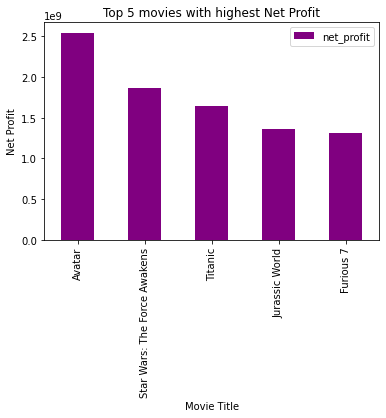

In [20]:
# Plotting a chart to display the top5 movies the highest Net Profit

net_profit_movies = df_movies.nlargest(5, 'net_profit')
net_profit_movies.plot(kind = 'bar', x = 'movie_title', y = 'net_profit', color= 'purple',xlabel= 'Movie Title', ylabel= 'Net Profit', title= 'Top 5 movies with highest Net Profit')


From the above chart, the movie **Avatar** had the highest Net profit

### Research Question 3  (movie with the highest Revenue )

<AxesSubplot:title={'center':'Top 5 movies with highest Revenues'}, xlabel='Movie Title', ylabel='Revenue'>

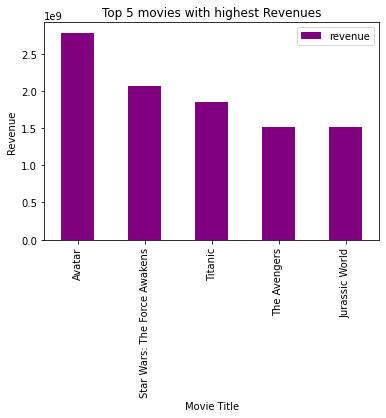

In [21]:
# Plotting a chart to display the top5 movies the highest revenues

top_5_revenues = df_movies.nlargest(5, 'revenue')
top_5_revenues.plot(kind = 'bar', x = 'movie_title', y = 'revenue', color= 'purple',xlabel='Movie Title', ylabel='Revenue', title= 'Top 5 movies with highest Revenues')



From the above chart, the movie **Avatar** had the highest revenue

### Research Question 4  (movie with the highest Net Profit with respect to the 2010 (inflation) )

<AxesSubplot:title={'center':'Top 5 movies with highest Net Profit (2010)'}, xlabel='Movie Title', ylabel='Net Profit (2010)'>

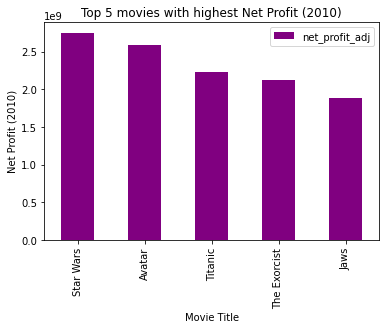

In [22]:
# Plotting a chart to display the top5 movies the highest Net Profit in terms of 2010 dollars, accounting for inflation overtime
net_profit_adj_movies = df_movies.nlargest(5, 'net_profit_adj')
net_profit_adj_movies.plot(kind = 'bar', x = 'movie_title', y = 'net_profit_adj', color= 'purple',xlabel= 'Movie Title', ylabel='Net Profit (2010)', title= 'Top 5 movies with highest Net Profit (2010)')


From the above chart, the movie **Star Wars** generated the highest revenue in terms of 2010 dollars, accounting for inflation

### Research Question 5  (Correlation between the Net Profit, Revenue, Budget and that of those of 2010 (inflation)  )

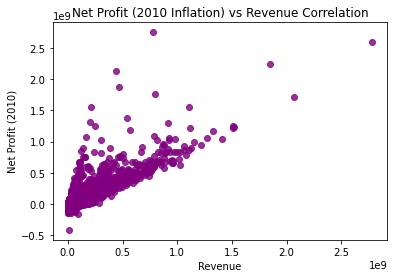

In [24]:
# Find the correlation between revenue & net_profit_adj
# plot relationship between revenue and net_profit 

plt.scatter(df_movies['revenue'], df_movies['net_profit_adj'], alpha=0.8, color= 'purple')
plotchart('Revenue', 'Net Profit (2010)', 'Net Profit (2010 Inflation) vs Revenue Correlation')

The correlation between **net_profit_adj** and **revenue** was a **weak positive** one

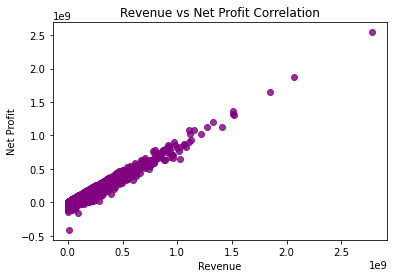

In [26]:
# Find the correlation between net_profit & revenue
# plot relationship between revenue and net_profit 

plt.scatter(df_movies['revenue'], df_movies['net_profit'], alpha=0.8, color= 'purple')
plotchart('Revenue', 'Net Profit', 'Revenue vs Net Profit Correlation')

The correlation between **net_profit** and **revenue** was a **strong positive** one

In [27]:
# Calculating skewness (net_profit normal)
df_movies.net_profit.skew()

7.5975756675646835

In [28]:
# Calculating skewness (net_profit inflation)
df_movies.net_profit_adj.skew()

7.293638717020621

Based on the skewness information, both net_profit (2015 and 2010 inflation) of movies are skewed to the right

### Research Question 6  (which cast appeared the most )

In [29]:
df_movies_cast = pd.Series(df_movies['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
df_movies_cast.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Tom Hanks             46
Gene Hackman          46
Johnny Depp           46
Christopher Walken    46
Dennis Quaid          45
Sylvester Stallone    45
Willem Dafoe          45
dtype: int64

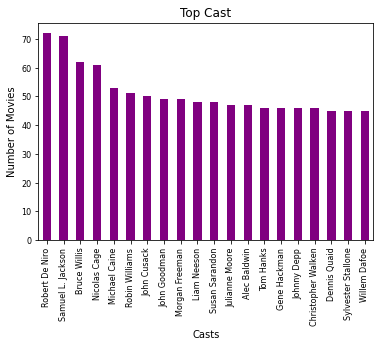

In [30]:
# Plot the cast with most features on movies
diagram = df_movies_cast.head(20).plot.bar(fontsize = 8, color= 'purple')
diagram.set(title = 'Top Cast')
diagram.set_xlabel('Casts')
diagram.set_ylabel('Number of Movies')
plt.show()

From the above genres graph, it shows that **Robert De Niro**  featured in most movies 

### Research Question 7  (most popular movie)

In [31]:
# To find the most popular movie

popularity = df_movies.popularity.max()
popular_movie_name = df_movies.loc[df_movies['popularity'].idxmax()].movie_title

print(f"{popular_movie_name} was the most popular movie with {popularity} rate.")

Jurassic World was the most popular movie with 32.985763 rate.


### Research Question 8  (most voted movie)

In [32]:
# To find the most voted movie

highest_votes = df_movies.vote_count.max()
highest_voted_movie = df_movies.loc[df_movies['vote_count'].idxmax()].movie_title

print(f"{highest_voted_movie} was the most voted movie with {highest_votes} votes.")

Inception was the most voted movie with 9767 votes.


# Based on Net profit, top 5 cast that appeared the most

In [33]:
net_profit_movies = df_movies.nlargest(10, 'net_profit')
net_profit_movies.head()

,id,imdb_id,popularity,budget,revenue,movie_title,cast,director,tagline,keywords,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day,net_profit,net_profit_adj
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,December,Thursday,2.544506e+09,2.586237e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday,1.868178e+09,1.718723e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,November,Tuesday,1.645034e+09,2.234714e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday,1.363529e+09,1.254446e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday,1.316249e+09,1.210949e+09


In [34]:
net_profit_cast_count = pd.Series(net_profit_movies['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
net_profit_cast_count


Robert Downey Jr.      2
Chris Evans            2
Mark Ruffalo           2
Michelle Rodriguez     2
Chris Hemsworth        2
Scarlett Johansson     2
Maggie Smith           1
Daniel Radcliffe       1
Rupert Grint           1
Emma Watson            1
Alan Rickman           1
Sam Worthington        1
Dwayne Johnson         1
Idina Menzel           1
Jonathan Groff         1
Josh Gad               1
Santino Fontana        1
Sandra Bullock         1
Jeremy Northam         1
Dennis Miller          1
Wendy Gazelle          1
Kristen Bell           1
Jason Statham          1
Zoe Saldana            1
Leonardo DiCaprio      1
Sigourney Weaver       1
Stephen Lang           1
Harrison Ford          1
Mark Hamill            1
Carrie Fisher          1
Adam Driver            1
Daisy Ridley           1
Kate Winslet           1
Frances Fisher         1
Paul Walker            1
Billy Zane             1
Kathy Bates            1
Chris Pratt            1
Bryce Dallas Howard    1
Irrfan Khan            1


From the output, it shows that **Robert Downey Jr., Scarlett Johansson, Chris Hemsworth, Michelle Rodriguez, Mark Ruffalo, Chris Evans** featured the most in this category
      

# Based on Net profit, top 5 genres to that yielded the most net profit

In [35]:
net_profit_genres_count = pd.Series(net_profit_movies['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
net_profit_genres_count


Action             7
Adventure          7
Science Fiction    5
Thriller           4
Fantasy            3
Drama              2
Crime              2
Family             2
Romance            1
Animation          1
Mystery            1
dtype: int64

From the output, it shows that **Action,Adventure, Science Fiction, Thriller, Fantasy** were the top 5 genres based on the net profit.

   

<a id='conclusions'></a>
## Conclusions

**So from my findings, it seems that for movies to have top Net Profit then**

The top 5 genres been looked at should be **Action,Adventure, Science Fiction, Thriller, Fantasy**


The top 5 casts focused on are **Robert Downey Jr., Scarlett Johansson, Chris Hemsworth, Michelle Rodriguez, Mark Ruffalo, Chris Evans**


**Limitations associated with this findings**

Looking at the cast, it isn't certain that these casts when featured would yield huge Net profits


The vote_average wasn't certain how it was gotten, would've looked into the votes.


List of references I used in solving this project

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html

https://pythonexamples.org/python-convert-int-to-float/